YouTube is the world’s most popular and widely used video platform today. 

### Data Science Project on Youtube Trending Videos Analysis with Python
The dataset that I will be using for the analysis of Youtube trending videos was collected over 205 days. For each of those days, the dataset contains data on trending videos for that day. It contains data on over 40,000 trending videos.

We will analyze the data to get insight on trending YouTube videos, to see what is common among all trending videos. This information can also be used by people who want to increase the popularity of their videos on YouTube.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [2]:
df = pd.read_csv("USvideos.csv")

In [3]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]

In [4]:
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

## Data Exploration
The description column has some null values. These are some of the rows with null description values. So, to do some sort of data cleaning and to get rid of those null values, I’m going to put an empty string in place of each null value in the Description column:

The description column has some null values. These are some of the rows with null description values. So, to do some sort of data cleaning and to get rid of those null values, I’m going to put an empty string in place of each null value in the Description column:


Now let’s take a look at some statistical information about the numeric columns in our dataset:

In [6]:
df["description"] = df["description"].fillna(value="")

In [7]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


### Data Visualization
Now we want to see how many trending video titles have at least one uppercase word (eg WHAT). To do this, we’ll add a new variable to the dataset whose value is True if the video title contains at least one uppercase word, and False otherwise:

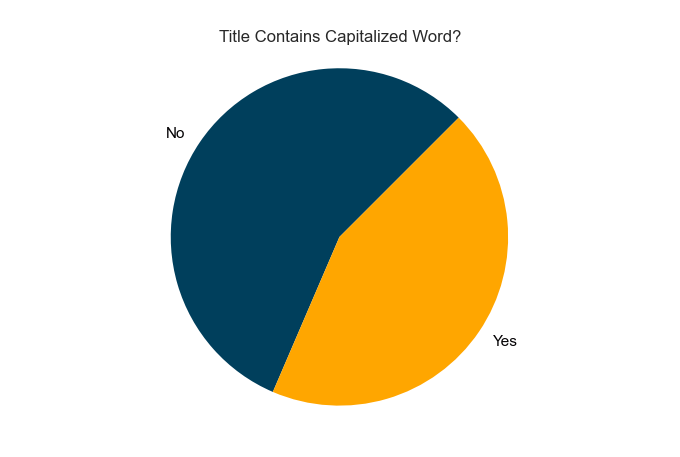

In [8]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

We can see that 44% of trending video titles contain at least one word in all caps. We will use our added variable later to analyze the correlation between the variables.

Let’s add another column to our dataset to analyze the length of titles of videos, then plot the title length histogram to get an idea of the length of trending video titles:

C:\Users\Deeksha Kotian\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


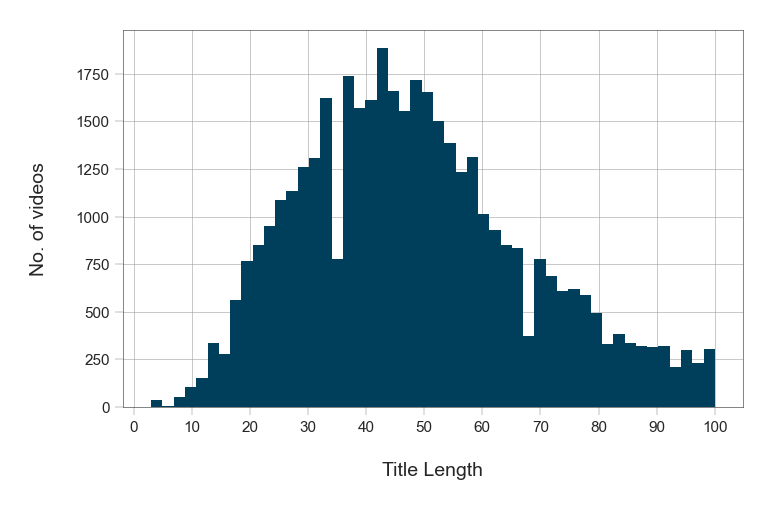

In [9]:

df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

We can see that the videos title length distribution looks like a normal distribution, where most videos have a title length of around 30-60 characters. Now, let’s draw a scatter plot to analyze the relationship between the title length and the number of views:

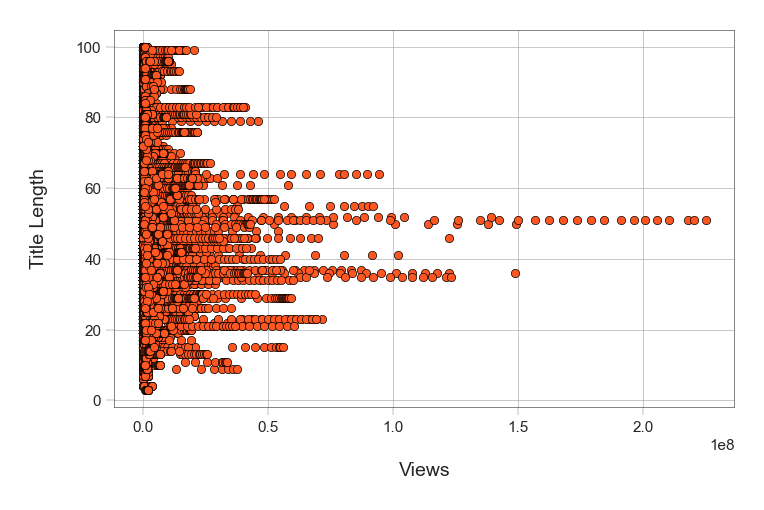

In [10]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

Looking at the scatter plot, we can tell that there is no relationship between the length of the title and the number of views. However, we do notice an interesting thing that the Videos having 100,000,000 and more views have a title length of between 33 and 55 characters or so.

Youtube Trending Videos Analysis: Correlation
Now let’s see how the variables in the dataset correlate to each other: for example, we would like to see how views and likes correlate, meaning that views and likes increase and decrease together:

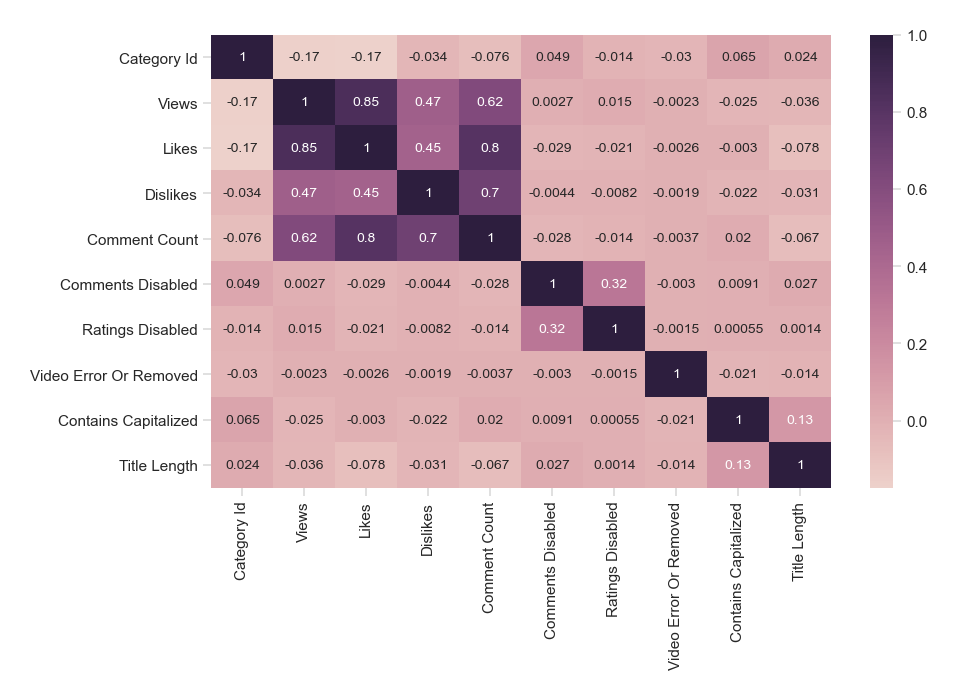

In [11]:

h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

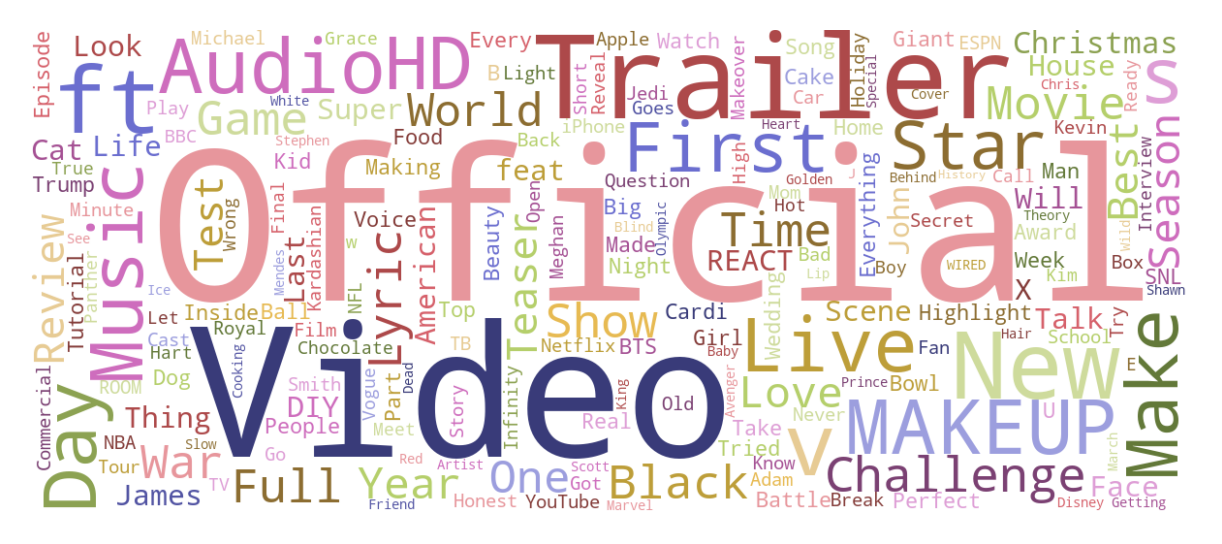

In [12]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")